In [15]:
##-----------------------------------------------
## Thư viện
##-----------------------------------------------
import joblib            as jlb
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sbn
import os

from sklearn.model_selection import train_test_split  
from sklearn                 import svm
from sklearn.metrics          import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [16]:
##-----------------------------------------------
## Đọc dữ liệu Breast Cancer
##-----------------------------------------------
folder = '../../'  # tùy bạn
data = pd.read_csv(folder + 'Data/Breast Cancer WI.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [19]:
##-----------------------------------------------
## Chuẩn bị dữ liệu
##-----------------------------------------------
y = data['Class']
print(y.head())

print("===========================================================")

nb_features = data.shape[1] - 1
features    = data.columns[:nb_features]
x           = data[features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features))

print("===========================================================")

print("Các nhãn (classes): ", y.unique())

print("===========================================================")

print("Số trường hợp CÓ    bệnh (Malignant):", y[y == 'Malignant'].size)
print("Số trường hợp KHÔNG bệnh (Benign)   :", y[y == 'Benign'].size)


0    Malignant
1    Malignant
2    Malignant
3    Malignant
4    Malignant
Name: Class, dtype: object
* Số lượng features = 30
  Các features: radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst
Các nhãn (classes):  ['Malignant' 'Benign']
Số trường hợp CÓ    bệnh (Malignant): 212
Số trường hợp KHÔNG bệnh (Benign)   : 357


In [21]:
##-----------------------------------------------
## Chia tập dữ liệu
##-----------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(f"Training size: {x_train.shape[0]}, Test size: {x_test.shape[0]}")

Training size: 455, Test size: 114


In [22]:
##-----------------------------------------------
## Xây dựng mô hình SVM (kernel tuyến tính)
##-----------------------------------------------
model = svm.SVC(kernel='linear', probability=True)  # cần probability=True để tính AUC
model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [32]:
##-----------------------------------------------
## Dự đoán và đánh giá mô hình
##-----------------------------------------------
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

## Các độ đo
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision (macro)': precision_score(y_test, y_pred, average='macro'),
    'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
    'F1-score (macro)': f1_score(y_test, y_pred, average='macro'),
    'AUC': roc_auc_score((y_test == 'Malignant').astype(int), y_proba)
}

print("\n================= ĐÁNH GIÁ MÔ HÌNH =================")
for k, v in metrics.items():
    print(f"{k:20s}: {v*100:.2f}%")

print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred))


================= ĐÁNH GIÁ MÔ HÌNH =================
Accuracy            : 95.61%
Precision (macro)   : 96.75%
Recall (macro)      : 94.05%
F1-score (macro)    : 95.16%
AUC                 : 97.59%

Báo cáo chi tiết:
              precision    recall  f1-score   support

      Benign       0.94      1.00      0.97        72
   Malignant       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



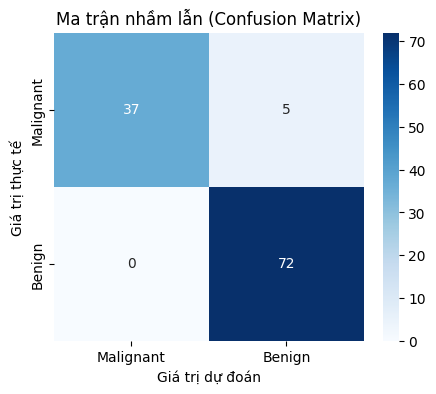

In [28]:
##-----------------------------------------------
## Ma trận nhầm lẫn
##-----------------------------------------------
cm = confusion_matrix(y_test, y_pred, labels=['Malignant', 'Benign'])
plt.figure(figsize=(5,4))
sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.title('Ma trận nhầm lẫn (Confusion Matrix)')
plt.show()

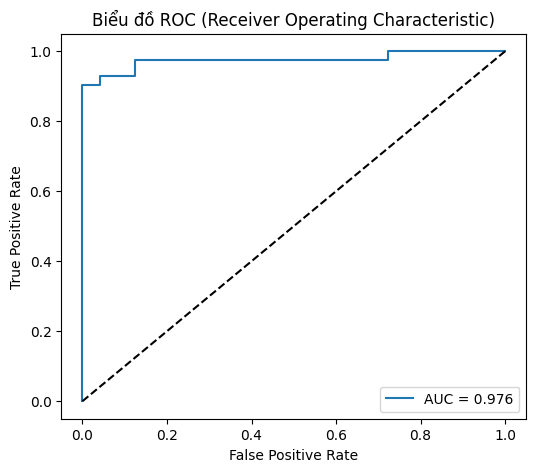

In [29]:
##-----------------------------------------------
## Biểu đồ ROC
##-----------------------------------------------
fpr, tpr, _ = roc_curve((y_test == 'Malignant').astype(int), y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {metrics["AUC"]:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Biểu đồ ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.show()

In [24]:
##-----------------------------------------------
## Lưu mô hình
##-----------------------------------------------
output_dir = os.path.join('../Output')
os.makedirs(output_dir, exist_ok=True)
model_path = os.path.join(output_dir, 'Breast Cancer.svm')
jlb.dump(model, model_path)
print(f"\n✅ Đã lưu mô hình tại: {model_path}")


✅ Đã lưu mô hình tại: ../Output\Breast Cancer.svm


In [25]:
##-----------------------------------------------
## Khai thác mô hình đã huấn luyện
##-----------------------------------------------
model = jlb.load(model_path)
tiep = 'C'
while tiep.upper() == 'C':
    idx = int(eval(input(f'Nhập chỉ số dòng từ 0 đến {x_test.shape[0]-1}: ')))
    idx = idx % x_test.shape[0]
    x_new = x_test.iloc[idx:idx + 1]
    y_pred = model.predict(x_new)
    print('\nMẫu được chọn:')
    print(x_new.to_string())
    print('👉 Dự đoán:', 'CÓ bệnh (Malignant)' if y_pred[0] == 'Malignant' else 'KHÔNG có bệnh (Benign)')
    tiep = input('Tiếp tục (C/K)? ')


Mẫu được chọn:
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
531        11.67         20.02           75.21      416.2           0.1016           0.09453           0.042              0.02157         0.1859                 0.06461     0.2067      0.8745         1.393    15.34       0.005251         0.01727        0.0184           0.005298      0.01449              0.002671         13.35          28.81             87.0       550.6             0.155             0.2964           0.2758                0.0812          0.3206                   0.0895
👉 Dự đ